In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import csv
import pandas as pd
import numpy as np
import matplotlib.ticker as plticker
import cv2

In [15]:
df = pd.read_csv('../data.csv')
df.head()

,ImageLOC,ROI,Classes
0,./../ResizedJPEGImages/0.jpg,[[ 82 126 324 290] [ 92 1 348 157]],[cat chair]
1,./../ResizedJPEGImages/1.jpg,[[339 39 399 209] [111 130 263 385] [ 14 20...,[tvmonitor person chair]
2,./../ResizedJPEGImages/2.jpg,[[ 92 212 401 416] [ 52 79 158 389] [125 12...,[horse person person person horse]
3,./../ResizedJPEGImages/3.jpg,[[ 44 163 406 396]],[bus]
4,./../ResizedJPEGImages/4.jpg,[[201 147 234 250] [ 93 217 157 357] [ 47 13...,[person person car car]


In [16]:
def convert_numpy():
    a = df['ROI'][:]
    for i in range(df['ROI'].shape[0]):   
        b = a[i].replace('[', '')
        b = b.replace(']', '')
        b = np.fromstring(b, dtype=int, sep=' ')
        l = len(b)
        l = l/4
        b = np.split(b, l)
        b = np.asarray(b)
        df['ROI'][i] = b

    
convert_numpy()

In [ ]:
def convert_class():
    for i in range(df['Classes'].shape[0]):
        cls = []
        cls_ = df['Classes'][i]
        cls_ = cls_.replace('[', '')
        cls_ = cls_.replace(']', '')
        cls = cls_.split(' ')
        df['Classes'][i] = cls

convert_class()

In [ ]:
img_loc = df['ImageLOC'][:]
roi = df['ROI'][:]
cls = df['Classes'][:]

['cat', 'chair']
82 126 324 290
92 1 348 157


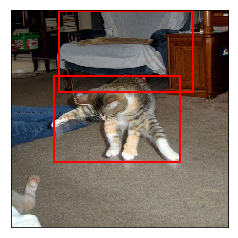

(416, 416, 3)
['tvmonitor', 'person', 'chair']
339 39 399 209
111 130 263 385
14 203 177 416


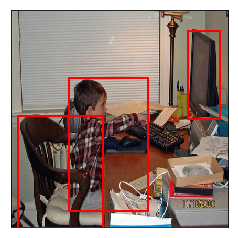

(416, 416, 3)


In [14]:
def plot_image(sample_image, sample_roi, sample_cls):    
    
    im = np.array(Image.open(sample_image), dtype=np.uint8)
    fix, ax = plt.subplots()
    ax.imshow(im)
    for i in range(sample_roi.shape[0]):
        x = sample_roi[i][0]
        y = sample_roi[i][1]
        x_max, y_max = sample_roi[i][2], sample_roi[i][3]
        print(x, y, x_max, y_max)
        rect = patches.Rectangle((x, y), (x_max - x), (y_max - y), linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.show()
    print(im.shape)
    
    
for j in range(0, 2):
    sample_img_loc = img_loc[j]
    sample_roi = roi[j]
    sample_cls = cls[j]
    print(sample_cls)
    plot_image(sample_img_loc, sample_roi, sample_cls)

In [ ]:
def plot_grid():
    image = Image.open(sample_img_loc)
    my_dpi=200.
    mid_img = (np.int(416/2), np.int(416/2))
    fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
    ax=fig.add_subplot(111)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    myInterval=32
    loc = plticker.MultipleLocator(base=myInterval)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    for i in range(sample_roi.shape[0]):
        x = sample_roi[i][0]
        y = sample_roi[i][1]
        x_max, y_max = sample_roi[i][2], sample_roi[i][3]
        mid_ = (x+((x_max - x)/2), y+((y_max - y)/2))
        print(x, y, x_max, y_max)
        rect = patches.Rectangle((x, y), (x_max - x), (y_max - y), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.plot(mid_[0], mid_[1], color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=1.5)

    plt.plot(mid_img[0], mid_img[1], color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=2)
    ax.imshow(image)

plot_grid()


In [ ]:
def get_grids(sample_roi):
    a_s = []
    b_s = []
    for i in range(sample_roi.shape[0]):

        x = sample_roi[i][0]
        y = sample_roi[i][1]
        x_max, y_max = sample_roi[i][2], sample_roi[i][3]
        mid_ = (x+((x_max - x)/2), y+((y_max - y)/2))

        for i in range(13):
            min_g = i*32
            max_g = min_g + 32

            if mid_[0] > min_g and mid_[0] < max_g:
                a_s.append(i)
        for i in range(13):
            min_g = i*32
            max_g = min_g + 32
            if mid_[1] > min_g and mid_[1] < max_g:
                b_s.append(i) 
    return a_s, b_s

a_s, b_s = get_grids(roi[1])
print(a_s, b_s)

def get_grids2(sample_roi):
    x_center = (sample_roi[0] + sample_roi[2])/2.0 
    y_center = (sample_roi[1] + sample_roi[3])/2.0 
    a_s = int(x_center/32.0)
    b_s = int(y_center/32.0)
    return a_s, b_s

a_s, b_s = get_grids2([111, 130, 263, 385])
print(a_s, b_s)
    

In [ ]:
anchors = [[0.57273, 0.677385], [1.87446, 2.06253], [3.33843, 5.47434], [7.88282, 3.52778], [9.77052, 9.16828]]

def plot_anchors(sample_image, grid):
    
    image = Image.open(sample_image)
    my_dpi=200.
    fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
    ax=fig.add_subplot(111)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    myInterval=32
    loc = plticker.MultipleLocator(base=myInterval)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    grid_x = grid[0]*32
    grid_y = grid[1]*32
    mid_grid = (grid_x + (32/2), grid_y + (32/2))
    
    for i in range(5):
        anc_w = anchors[i][0]*32
        anc_h = anchors[i][1]*32
        anc_x = mid_grid[0] - (anc_w/2)
        anc_y = mid_grid[1] - (anc_h/2)
        rect = patches.Rectangle((anc_x, anc_y), anc_w, anc_h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    ax.imshow(image)
    
plot_anchors(img_loc[1], [6, 6])

    
    

In [ ]:
def calc_iou(bb1, bb2):
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
sample_iou = calc_iou(sample_roi[0], sample_roi[1])
print(sample_iou)
sample_iou = calc_iou([10, 10, 20, 20], [10, 10, 20, 20])
print(sample_iou)
sample_iou = calc_iou([10, 10, 20, 20], [30, 30, 40, 40])
print(sample_iou)

In [ ]:
def redef_anchors(anchors_, grid):
    anchors = []
    grid_x = grid[0]*32
    grid_y = grid[1]*32
    mid_grid = (grid_x + (32/2), grid_y + (32/2))
    for i in range(5):
        anc_w = anchors_[i][0]*32
        anc_h = anchors_[i][1]*32
        anc_x = mid_grid[0] - (anc_w/2)
        anc_y = mid_grid[1] - (anc_h/2)
        anc_x_max = anc_x + anc_w
        anc_y_max = anc_y + anc_h
        anc = [int(anc_x), int(anc_y), int(anc_x_max), int(anc_y_max)]
        for i in range(len(anc)):
            if anc[i] < 0:
                anc[i] = 0
            elif anc[i] > 415:
                anc[i] = 415
        anchors.append(anc)
    return anchors

[7, 7] [6, 5]
[[210, 145, 242, 292], [197, 104, 259, 235]] 

[[230, 197, 249, 218], [210, 174, 269, 241], [186, 120, 293, 295], [113, 151, 366, 264], [83, 61, 396, 354]]
['0.05195', '0.32919', '0.25121', '0.12185', '0.05129'] 

[  0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.32919 210.      145.
 242.      292.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   1.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0. 

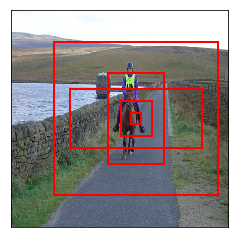

[[230, 165, 249, 186], [210, 142, 269, 209], [186, 88, 293, 263], [113, 119, 366, 232], [83, 29, 396, 322]]
['0.04913', '0.37341', '0.43375', '0.23585', '0.08856'] 

[  0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.43375 197.      104.      259.      235.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        1.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.       

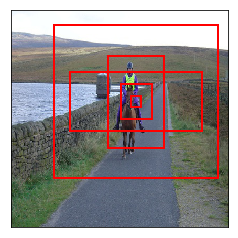

[7, 7] [6, 5]
[7] [6]
[[177, 159, 310, 234]] 

[[230, 197, 249, 218], [210, 174, 269, 241], [186, 120, 293, 295], [113, 151, 366, 264], [83, 61, 396, 354]]
['0.04000', '0.34078', '0.38815', '0.34891', '0.10877'] 

[  0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.38815 177.      159.      310.      234.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        1.        0.        0.        0.
   0.        0.        0.        0.        0.        0.     

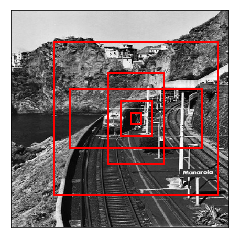

[7] [6]


In [13]:
df = pd.read_csv('../data.csv')
anchors_ = [[0.57273, 0.677385], [1.87446, 2.06253], [3.33843, 5.47434], [7.88282, 3.52778], [9.77052, 9.16828]]
classes_num = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5,
    'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11,
    'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16,
    'sofa': 17, 'train': 18, 'tvmonitor': 19}

def convert_numpy():
    a = df['ROI'][:]
    for i in range(df['ROI'].shape[0]):   
        b = a[i].replace('[', '')
        b = b.replace(']', '')
        b = np.fromstring(b, dtype=int, sep=' ')
        l = len(b)
        l = l/4
        b = np.split(b, l)
        b = np.asarray(b)
        df['ROI'][i] = b
convert_numpy()

def convert_class():
    for i in range(df['Classes'].shape[0]):
        cls = []
        cls_ = df['Classes'][i]
        cls_ = cls_.replace('[', '')
        cls_ = cls_.replace(']', '')
        cls_ = cls_.replace('\n', '')
        cls = cls_.split(' ')
        df['Classes'][i] = cls
convert_class()

def get_grids2(sample_roi):
    x_center = (sample_roi[0] + sample_roi[2])/2.0 
    y_center = (sample_roi[1] + sample_roi[3])/2.0 
    a_s = int(x_center/32.0)
    b_s = int(y_center/32.0)
    return a_s, b_s

def redef_anchors(anchors_, grid):
    anchors = []
    grid_x = grid[0]*32
    grid_y = grid[1]*32
    mid_grid = (grid_x + (32/2), grid_y + (32/2))
    for i in range(5):
        anc_w = anchors_[i][0]*32
        anc_h = anchors_[i][1]*32
        anc_x = mid_grid[0] - (anc_w/2)
        anc_y = mid_grid[1] - (anc_h/2)
        anc_x_max = anc_x + anc_w
        anc_y_max = anc_y + anc_h
        anc = [int(anc_x), int(anc_y), int(anc_x_max), int(anc_y_max)]
        for i in range(len(anc)):
            if anc[i] < 0:
                anc[i] = 0
            elif anc[i] > 415:
                anc[i] = 415
        anchors.append(anc)
    return anchors

def calc_iou(bb1, bb2):
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    iou = "%.5f" % iou
    return iou

def get_output_vector(img_loc, roi, cls, anchors=anchors_):
    output_vector = np.zeros((13, 13, 125), dtype=np.float32)
    grid_a, grid_b = [], []
    for i in range(roi.shape[0]):
        
        a_s, b_s = get_grids2(roi[i])
        grid_a.append(a_s)
        grid_b.append(b_s)
    print(grid_a, grid_b)
    out_anchor = []
    roi = np.ndarray.tolist(roi)
    print(roi, '\n')
    selected_anchor_pos = []
    selected_anchor_val = []
    
    for i in range(len(grid_a)):
        alloc_roi = roi[i]
        alloc_cls = cls[i]
        alloc_cls = classes_num[alloc_cls]
        not_alloc = True
        ious = []
        anchors = redef_anchors(anchors_, [grid_a[i], grid_b[i]])
        print(anchors)
        for j in range(5):
            iou = calc_iou(anchors[j], roi[i])
            ious.append(iou)
        print(ious, '\n')
        
        
        while(not_alloc):
            sel_anc_pos = np.argmax(ious)
            sel_anc_val = ious[sel_anc_pos]
            if output_vector[grid_a[i]][grid_b[i]][25*sel_anc_pos] == 0.0:
                output_vector[grid_a[i]][grid_b[i]][25*sel_anc_pos] = sel_anc_val
                for k in range(1, 5):
                    output_vector[grid_a[i]][grid_b[i]][25*sel_anc_pos + k] = alloc_roi[k-1]
                output_vector[grid_a[i]][grid_b[i]][25*sel_anc_pos + 5 + alloc_cls] = 1.0
                print(output_vector[grid_a[i]][grid_b[i]])
                not_alloc = False
            else:
                ious[sel_anc_pos] = 0.0
        
        
        im = np.array(Image.open(img_loc), dtype=np.uint8)
        fix, ax = plt.subplots()
        ax.imshow(im)
        for j in range(5):
            x = anchors[j][0]
            y = anchors[j][1]
            x_max, y_max = anchors[j][2], anchors[j][3]
            rect = patches.Rectangle((x, y), (x_max - x), (y_max - y), linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    print(grid_a, grid_b)
        
img_loc = df['ImageLOC'][:]
roi = df['ROI'][:]
cls = df['Classes'][:]
out_v = []
for z in range(8, 10):       
    sample_img_loc = img_loc[z]
    sample_roi = roi[z]
    sample_cls = cls[z]

    out_v.append(get_output_vector(sample_img_loc, sample_roi, sample_cls))